# Multivariate Student's-t data
This notebook analyses the performance of non-Gaussian (Student's-t) data and nearly normal Student's-t data. It allows to generate the plot given in the appendix of the report (see the last code chunk).

In [85]:
from visualization import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from scipy.stats import shapiro, normaltest
from imputation import *


%reload_ext autoreload
%autoreload 2

The goal of this notebook is to test the imputation with different types of non-gaussian data (heavy-tailed, chi-squared, etc) and see how the data, mean and covariance are estimated.

We consider the multivariate Student-t distribution, the Multivariate Normal and the Whishart distribution

## Student-t Multivariate Distribution

The multivariate Student-t distribution is useful for modeling datasets with heavy tails and is often used in finance. Quite often, especially in finance, the assumption of gaussianity on Student-t data can lead to bad estimations, we will therefore analyse this.

The multivariate Student-t has the following parameters

1.  **Mean vector** $\mu$: A $d$-dimensional vector representing the mean of the distribution.
2.  **Scale matrix** $\Sigma$: A positive definite $d \times d$ matrix.
3.  **Degrees of freedom** $\nu > 2$: A scalar value that determines the shape of the distribution's tails. As $\nu$ increases, the Student-t distribution approaches the normal distribution.

Its density function is given by:

$$
f(\mathbf{x} | \boldsymbol{\mu}, \boldsymbol{\Sigma}, \nu) = \frac{\Gamma\left(\frac{\nu + d}{2}\right)}{\Gamma\left(\frac{\nu}{2}\right) \nu^{\frac{d}{2}} \pi^{\frac{d}{2}} |\boldsymbol{\Sigma}|^{\frac{1}{2}}} \left(1 + \frac{1}{\nu} (\mathbf{x} - \boldsymbol{\mu})^\top \boldsymbol{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu}) \right)^{-\frac{\nu + d}{2}}
$$

where $\mathbf{x}$ is a $d$-dimensional data vector, $\Gamma$ is the gamma function, and $|\Sigma|$ is the determinant of $\Sigma$. The variance is given by $\nu \Sigma / (\nu -2)$.




#### Simulation with Student's-t data with random mean and scale matrix and $\nu = 4$ degrees of freedom.

In [50]:
# Generation of the multivariate t-distributed data
n = 300  # number of samples
d = 10  # number of features
df = 4  # degrees of freedom
mean = np.random.randn(d)  # mean vector
scale_matrix = 2*np.random.rand(d,d) - 2*np.random.rand(d,d) 
scale_matrix = scale_matrix.T.dot(scale_matrix) # make Scale matrix symmetric positive definite
real_cov = scale_matrix * df / (df - 2)  # real covariance matrix
print(np.linalg.eigvals(scale_matrix))  # check eigenvalues

X = generate_student_t(df, mean = mean, scale_matrix = scale_matrix, n_samples = n)

[2.07734223e+01 1.79819909e+01 9.87971798e+00 7.44812231e+00
 6.23842111e+00 2.91458981e+00 1.75984103e-02 1.76654712e+00
 1.36598129e+00 5.51648936e-01]


MCAR - Missing data percentage:  0.05
MCAR - Missing data percentage:  0.1


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MCAR - Missing data percentage:  0.15


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MCAR - Missing data percentage:  0.2


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MCAR - Missing data percentage:  0.25


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MCAR - Missing data percentage:  0.3


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MCAR - Missing data percentage:  0.35
MCAR - Missing data percentage:  0.4
MCAR - Missing data percentage:  0.45
MCAR - Missing data percentage:  0.5
MCAR - Missing data percentage:  0.55
MCAR - Missing data percentage:  0.6
MCAR - Missing data percentage:  0.05
MCAR - Missing data percentage:  0.1


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MCAR - Missing data percentage:  0.15


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MCAR - Missing data percentage:  0.2


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MCAR - Missing data percentage:  0.25


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MCAR - Missing data percentage:  0.3
MCAR - Missing data percentage:  0.35
MCAR - Missing data percentage:  0.4
MCAR - Missing data percentage:  0.45
MCAR - Missing data percentage:  0.5
MCAR - Missing data percentage:  0.55
MCAR - Missing data percentage:  0.6
MCAR - Missing data percentage:  0.05
MCAR - Missing data percentage:  0.1
MCAR - Missing data percentage:  0.15


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MCAR - Missing data percentage:  0.2


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MCAR - Missing data percentage:  0.25


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MCAR - Missing data percentage:  0.3
MCAR - Missing data percentage:  0.35
MCAR - Missing data percentage:  0.4
MCAR - Missing data percentage:  0.45
MCAR - Missing data percentage:  0.5
MCAR - Missing data percentage:  0.55
MCAR - Missing data percentage:  0.6
MCAR - Missing data percentage:  0.05
MCAR - Missing data percentage:  0.1


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MCAR - Missing data percentage:  0.15


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MCAR - Missing data percentage:  0.2


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MCAR - Missing data percentage:  0.25


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MCAR - Missing data percentage:  0.3
MCAR - Missing data percentage:  0.35
MCAR - Missing data percentage:  0.4
MCAR - Missing data percentage:  0.45
MCAR - Missing data percentage:  0.5
MCAR - Missing data percentage:  0.55
MCAR - Missing data percentage:  0.6
MCAR - Missing data percentage:  0.05
MCAR - Missing data percentage:  0.1
MCAR - Missing data percentage:  0.15


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MCAR - Missing data percentage:  0.2


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MCAR - Missing data percentage:  0.25


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MCAR - Missing data percentage:  0.3


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MCAR - Missing data percentage:  0.35
MCAR - Missing data percentage:  0.4
MCAR - Missing data percentage:  0.45
MCAR - Missing data percentage:  0.5
MCAR - Missing data percentage:  0.55
MCAR - Missing data percentage:  0.6
MAR - Missing data percentage:  0.05


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MAR - Missing data percentage:  0.1


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MAR - Missing data percentage:  0.15


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MAR - Missing data percentage:  0.2


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MAR - Missing data percentage:  0.25
MAR - Missing data percentage:  0.3
MAR - Missing data percentage:  0.35
MAR - Missing data percentage:  0.4
MAR - Missing data percentage:  0.45
MAR - Missing data percentage:  0.5
MAR - Missing data percentage:  0.55
MAR - Missing data percentage:  0.6
MAR - Missing data percentage:  0.05
MAR - Missing data percentage:  0.1
MAR - Missing data percentage:  0.15


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MAR - Missing data percentage:  0.2


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MAR - Missing data percentage:  0.25
MAR - Missing data percentage:  0.3
MAR - Missing data percentage:  0.35
MAR - Missing data percentage:  0.4
MAR - Missing data percentage:  0.45
MAR - Missing data percentage:  0.5
MAR - Missing data percentage:  0.55
MAR - Missing data percentage:  0.6
MAR - Missing data percentage:  0.05
MAR - Missing data percentage:  0.1


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MAR - Missing data percentage:  0.15


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MAR - Missing data percentage:  0.2


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MAR - Missing data percentage:  0.25


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MAR - Missing data percentage:  0.3
MAR - Missing data percentage:  0.35
MAR - Missing data percentage:  0.4
MAR - Missing data percentage:  0.45
MAR - Missing data percentage:  0.5
MAR - Missing data percentage:  0.55
MAR - Missing data percentage:  0.6
MAR - Missing data percentage:  0.05
MAR - Missing data percentage:  0.1


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MAR - Missing data percentage:  0.15


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MAR - Missing data percentage:  0.2


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MAR - Missing data percentage:  0.25


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MAR - Missing data percentage:  0.3


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MAR - Missing data percentage:  0.35
MAR - Missing data percentage:  0.4
MAR - Missing data percentage:  0.45
MAR - Missing data percentage:  0.5
MAR - Missing data percentage:  0.55
MAR - Missing data percentage:  0.6
MAR - Missing data percentage:  0.05
MAR - Missing data percentage:  0.1


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MAR - Missing data percentage:  0.15


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MAR - Missing data percentage:  0.2


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MAR - Missing data percentage:  0.25
MAR - Missing data percentage:  0.3


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MAR - Missing data percentage:  0.35
MAR - Missing data percentage:  0.4
MAR - Missing data percentage:  0.45
MAR - Missing data percentage:  0.5
MAR - Missing data percentage:  0.55
MAR - Missing data percentage:  0.6
MNAR - Missing data percentage:  0.05
MNAR - Missing data percentage:  0.1


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MNAR - Missing data percentage:  0.15


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MNAR - Missing data percentage:  0.2


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MNAR - Missing data percentage:  0.25


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MNAR - Missing data percentage:  0.3
MNAR - Missing data percentage:  0.35
MNAR - Missing data percentage:  0.4
MNAR - Missing data percentage:  0.45
MNAR - Missing data percentage:  0.5
MNAR - Missing data percentage:  0.55
MNAR - Missing data percentage:  0.6
MNAR - Missing data percentage:  0.05


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MNAR - Missing data percentage:  0.1


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MNAR - Missing data percentage:  0.15


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MNAR - Missing data percentage:  0.2
MNAR - Missing data percentage:  0.25
MNAR - Missing data percentage:  0.3
MNAR - Missing data percentage:  0.35
MNAR - Missing data percentage:  0.4
MNAR - Missing data percentage:  0.45
MNAR - Missing data percentage:  0.5
MNAR - Missing data percentage:  0.55
MNAR - Missing data percentage:  0.6
MNAR - Missing data percentage:  0.05


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MNAR - Missing data percentage:  0.1


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MNAR - Missing data percentage:  0.15


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MNAR - Missing data percentage:  0.2
MNAR - Missing data percentage:  0.25
MNAR - Missing data percentage:  0.3
MNAR - Missing data percentage:  0.35
MNAR - Missing data percentage:  0.4
MNAR - Missing data percentage:  0.45
MNAR - Missing data percentage:  0.5
MNAR - Missing data percentage:  0.55
MNAR - Missing data percentage:  0.6
MNAR - Missing data percentage:  0.05


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MNAR - Missing data percentage:  0.1


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MNAR - Missing data percentage:  0.15


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MNAR - Missing data percentage:  0.2


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MNAR - Missing data percentage:  0.25
MNAR - Missing data percentage:  0.3
MNAR - Missing data percentage:  0.35
MNAR - Missing data percentage:  0.4
MNAR - Missing data percentage:  0.45
MNAR - Missing data percentage:  0.5
MNAR - Missing data percentage:  0.55
MNAR - Missing data percentage:  0.6
MNAR - Missing data percentage:  0.05


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MNAR - Missing data percentage:  0.1


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MNAR - Missing data percentage:  0.15


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MNAR - Missing data percentage:  0.2
MNAR - Missing data percentage:  0.25


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MNAR - Missing data percentage:  0.3
MNAR - Missing data percentage:  0.35
MNAR - Missing data percentage:  0.4
MNAR - Missing data percentage:  0.45
MNAR - Missing data percentage:  0.5
MNAR - Missing data percentage:  0.55
MNAR - Missing data percentage:  0.6


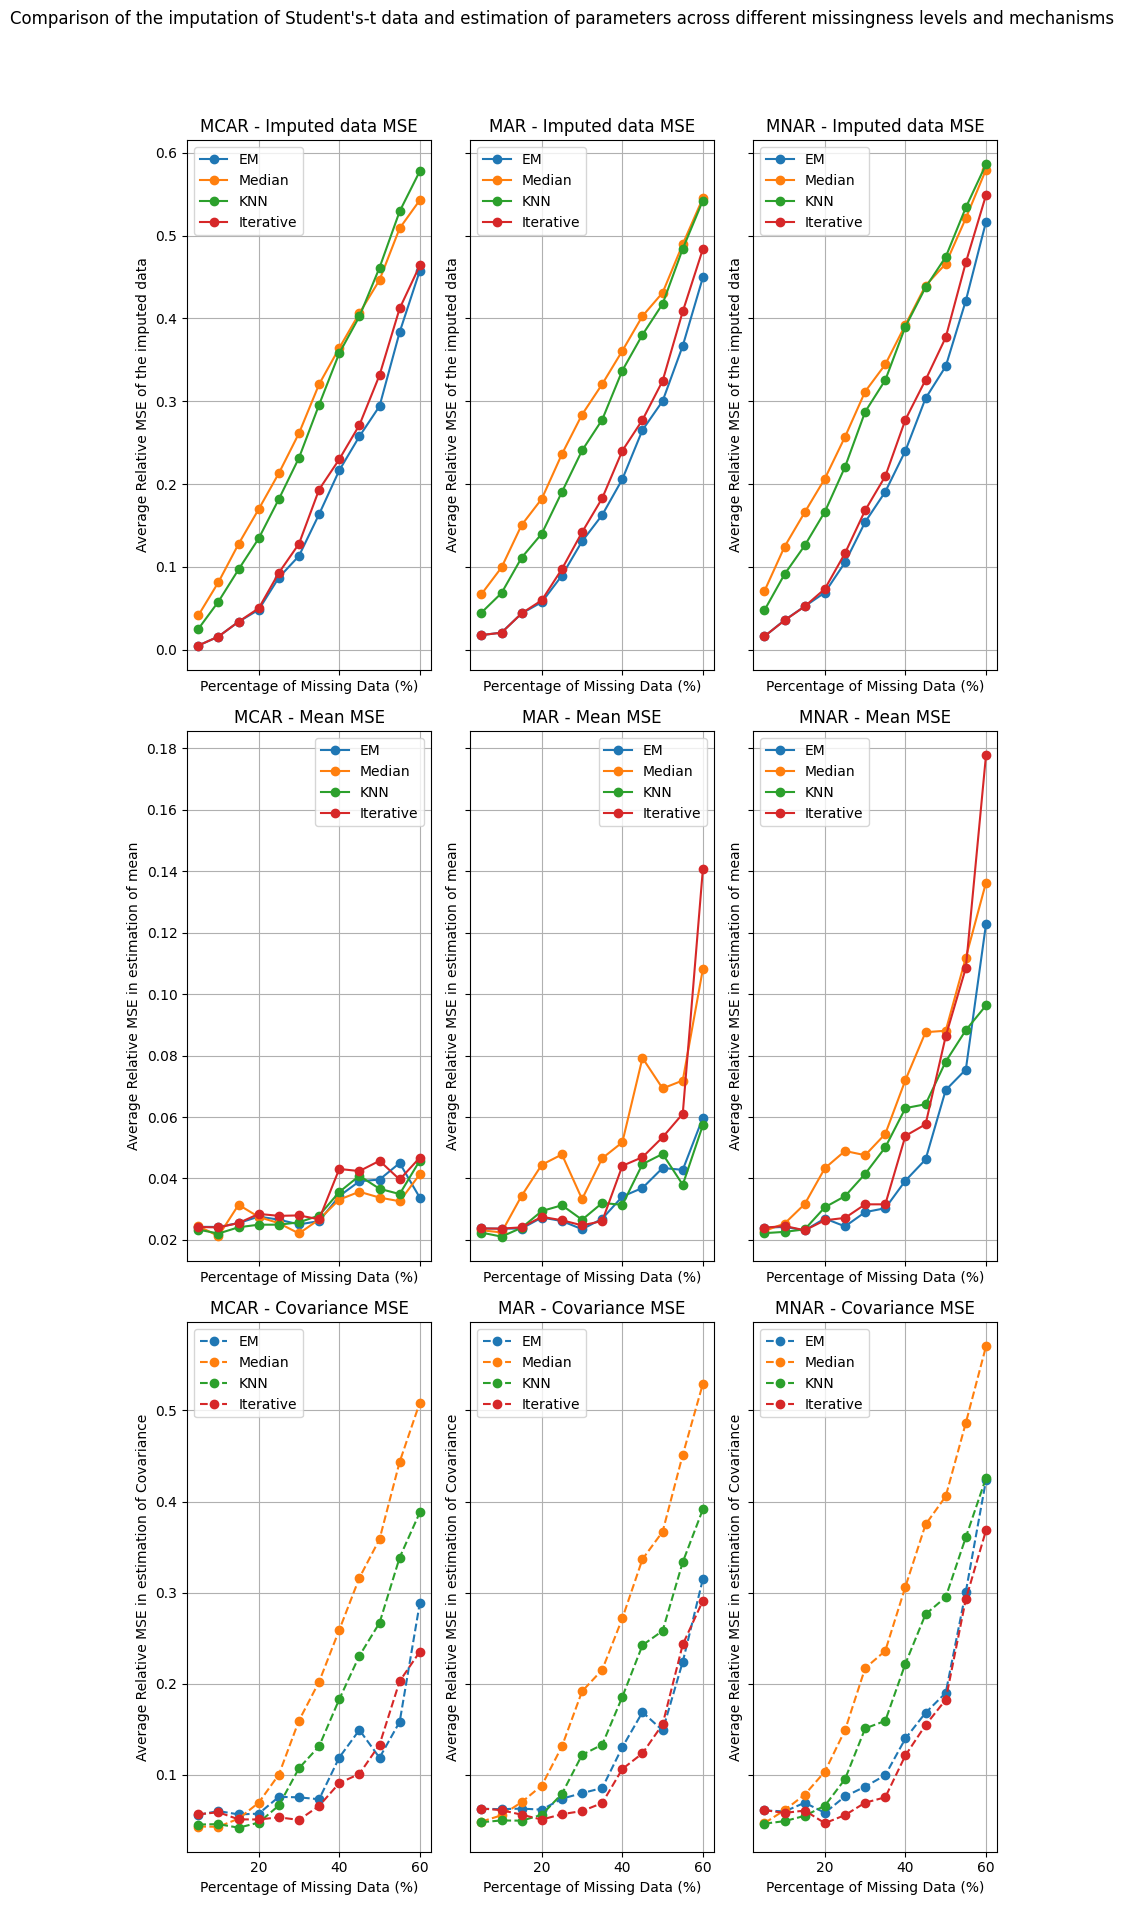

In [51]:
plot_all_differences_combined(X, real_mean = mean, real_cov = real_cov, plot_title = "Comparison of the imputation of Student's-t data and estimation of parameters across different missingness levels and mechanisms", verbose =True)

#### Simulation with Student's-t data that looks like Gaussian with random mean and scale matrix and $\nu = 12$ degrees of freedom.

Generation of the plot in appendix

In [81]:
# Generation of Student's-t distributed data that looks like normal data
n = 300  # number of samples
d = 10  # number of features
df = 12  # degrees of freedom. As df -> inf, Student's-t -> Normal
mean = np.random.randn(d)  # mean vector
scale_matrix = 2*np.random.rand(d,d) - 2*np.random.rand(d,d)  # scale matrix
scale_matrix = scale_matrix.T.dot(scale_matrix) # make scale matrix symmetric positive definite
real_cov_quasi_normal = scale_matrix * df / (df - 2)  # real covariance matrix

X_quasi_normal = generate_student_t(df, mean = mean, scale_matrix = scale_matrix, n_samples = n, quasi_normal=True)


Normality not rejected
Normality tests for X: Shapiro p-value = 0.09897998720407486, Normaltest p-value = [0.10911951 0.91970629 0.89948641 0.33179474 0.23135327 0.41421241
 0.90294636 0.05643513 0.11751733 0.45582134]


MCAR - Missing data percentage:  0.05
MCAR - Missing data percentage:  0.1


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MCAR - Missing data percentage:  0.15


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MCAR - Missing data percentage:  0.2


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MCAR - Missing data percentage:  0.25


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MCAR - Missing data percentage:  0.3


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MCAR - Missing data percentage:  0.35
MCAR - Missing data percentage:  0.4
MCAR - Missing data percentage:  0.45
MCAR - Missing data percentage:  0.5
MCAR - Missing data percentage:  0.55
MCAR - Missing data percentage:  0.6
MCAR - Missing data percentage:  0.05
MCAR - Missing data percentage:  0.1


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MCAR - Missing data percentage:  0.15


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MCAR - Missing data percentage:  0.2


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MCAR - Missing data percentage:  0.25


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MCAR - Missing data percentage:  0.3


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MCAR - Missing data percentage:  0.35
MCAR - Missing data percentage:  0.4
MCAR - Missing data percentage:  0.45
MCAR - Missing data percentage:  0.5
MCAR - Missing data percentage:  0.55
MCAR - Missing data percentage:  0.6
MCAR - Missing data percentage:  0.05
MCAR - Missing data percentage:  0.1


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MCAR - Missing data percentage:  0.15


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MCAR - Missing data percentage:  0.2


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MCAR - Missing data percentage:  0.25


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MCAR - Missing data percentage:  0.3


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MCAR - Missing data percentage:  0.35
MCAR - Missing data percentage:  0.4
MCAR - Missing data percentage:  0.45
MCAR - Missing data percentage:  0.5
MCAR - Missing data percentage:  0.55
MCAR - Missing data percentage:  0.6
MCAR - Missing data percentage:  0.05
MCAR - Missing data percentage:  0.1
MCAR - Missing data percentage:  0.15


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MCAR - Missing data percentage:  0.2


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MCAR - Missing data percentage:  0.25


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MCAR - Missing data percentage:  0.3


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MCAR - Missing data percentage:  0.35
MCAR - Missing data percentage:  0.4
MCAR - Missing data percentage:  0.45
MCAR - Missing data percentage:  0.5
MCAR - Missing data percentage:  0.55
MCAR - Missing data percentage:  0.6
MCAR - Missing data percentage:  0.05
MCAR - Missing data percentage:  0.1


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MCAR - Missing data percentage:  0.15


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MCAR - Missing data percentage:  0.2


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MCAR - Missing data percentage:  0.25


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MCAR - Missing data percentage:  0.3
MCAR - Missing data percentage:  0.35
MCAR - Missing data percentage:  0.4
MCAR - Missing data percentage:  0.45
MCAR - Missing data percentage:  0.5
MCAR - Missing data percentage:  0.55
MCAR - Missing data percentage:  0.6
MAR - Missing data percentage:  0.05


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MAR - Missing data percentage:  0.1


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MAR - Missing data percentage:  0.15


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MAR - Missing data percentage:  0.2


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MAR - Missing data percentage:  0.25


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MAR - Missing data percentage:  0.3
MAR - Missing data percentage:  0.35
MAR - Missing data percentage:  0.4
MAR - Missing data percentage:  0.45
MAR - Missing data percentage:  0.5
MAR - Missing data percentage:  0.55
MAR - Missing data percentage:  0.6
MAR - Missing data percentage:  0.05


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MAR - Missing data percentage:  0.1


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MAR - Missing data percentage:  0.15


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MAR - Missing data percentage:  0.2


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MAR - Missing data percentage:  0.25


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MAR - Missing data percentage:  0.3


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MAR - Missing data percentage:  0.35


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MAR - Missing data percentage:  0.4
MAR - Missing data percentage:  0.45
MAR - Missing data percentage:  0.5
MAR - Missing data percentage:  0.55
MAR - Missing data percentage:  0.6
MAR - Missing data percentage:  0.05
MAR - Missing data percentage:  0.1


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MAR - Missing data percentage:  0.15


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MAR - Missing data percentage:  0.2


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MAR - Missing data percentage:  0.25


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MAR - Missing data percentage:  0.3
MAR - Missing data percentage:  0.35
MAR - Missing data percentage:  0.4
MAR - Missing data percentage:  0.45
MAR - Missing data percentage:  0.5
MAR - Missing data percentage:  0.55
MAR - Missing data percentage:  0.6
MAR - Missing data percentage:  0.05
MAR - Missing data percentage:  0.1


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MAR - Missing data percentage:  0.15


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MAR - Missing data percentage:  0.2


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MAR - Missing data percentage:  0.25


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MAR - Missing data percentage:  0.3
MAR - Missing data percentage:  0.35
MAR - Missing data percentage:  0.4
MAR - Missing data percentage:  0.45
MAR - Missing data percentage:  0.5
MAR - Missing data percentage:  0.55
MAR - Missing data percentage:  0.6
MAR - Missing data percentage:  0.05


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MAR - Missing data percentage:  0.1


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MAR - Missing data percentage:  0.15


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MAR - Missing data percentage:  0.2


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MAR - Missing data percentage:  0.25


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MAR - Missing data percentage:  0.3


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MAR - Missing data percentage:  0.35
MAR - Missing data percentage:  0.4
MAR - Missing data percentage:  0.45
MAR - Missing data percentage:  0.5
MAR - Missing data percentage:  0.55
MAR - Missing data percentage:  0.6
MNAR - Missing data percentage:  0.05


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MNAR - Missing data percentage:  0.1


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MNAR - Missing data percentage:  0.15


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MNAR - Missing data percentage:  0.2


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MNAR - Missing data percentage:  0.25


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MNAR - Missing data percentage:  0.3
MNAR - Missing data percentage:  0.35
MNAR - Missing data percentage:  0.4
MNAR - Missing data percentage:  0.45
MNAR - Missing data percentage:  0.5
MNAR - Missing data percentage:  0.55
MNAR - Missing data percentage:  0.6
MNAR - Missing data percentage:  0.05


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MNAR - Missing data percentage:  0.1


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MNAR - Missing data percentage:  0.15


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MNAR - Missing data percentage:  0.2


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MNAR - Missing data percentage:  0.25


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MNAR - Missing data percentage:  0.3
MNAR - Missing data percentage:  0.35
MNAR - Missing data percentage:  0.4
MNAR - Missing data percentage:  0.45
MNAR - Missing data percentage:  0.5
MNAR - Missing data percentage:  0.55
MNAR - Missing data percentage:  0.6
MNAR - Missing data percentage:  0.05
MNAR - Missing data percentage:  0.1


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MNAR - Missing data percentage:  0.15


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MNAR - Missing data percentage:  0.2


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MNAR - Missing data percentage:  0.25


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MNAR - Missing data percentage:  0.3
MNAR - Missing data percentage:  0.35
MNAR - Missing data percentage:  0.4
MNAR - Missing data percentage:  0.45
MNAR - Missing data percentage:  0.5
MNAR - Missing data percentage:  0.55
MNAR - Missing data percentage:  0.6
MNAR - Missing data percentage:  0.05


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MNAR - Missing data percentage:  0.1


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MNAR - Missing data percentage:  0.15


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MNAR - Missing data percentage:  0.2


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MNAR - Missing data percentage:  0.25


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MNAR - Missing data percentage:  0.3
MNAR - Missing data percentage:  0.35
MNAR - Missing data percentage:  0.4
MNAR - Missing data percentage:  0.45
MNAR - Missing data percentage:  0.5
MNAR - Missing data percentage:  0.55
MNAR - Missing data percentage:  0.6
MNAR - Missing data percentage:  0.05
MNAR - Missing data percentage:  0.1


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MNAR - Missing data percentage:  0.15


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MNAR - Missing data percentage:  0.2


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MNAR - Missing data percentage:  0.25
MNAR - Missing data percentage:  0.3
MNAR - Missing data percentage:  0.35
MNAR - Missing data percentage:  0.4
MNAR - Missing data percentage:  0.45
MNAR - Missing data percentage:  0.5
MNAR - Missing data percentage:  0.55
MNAR - Missing data percentage:  0.6


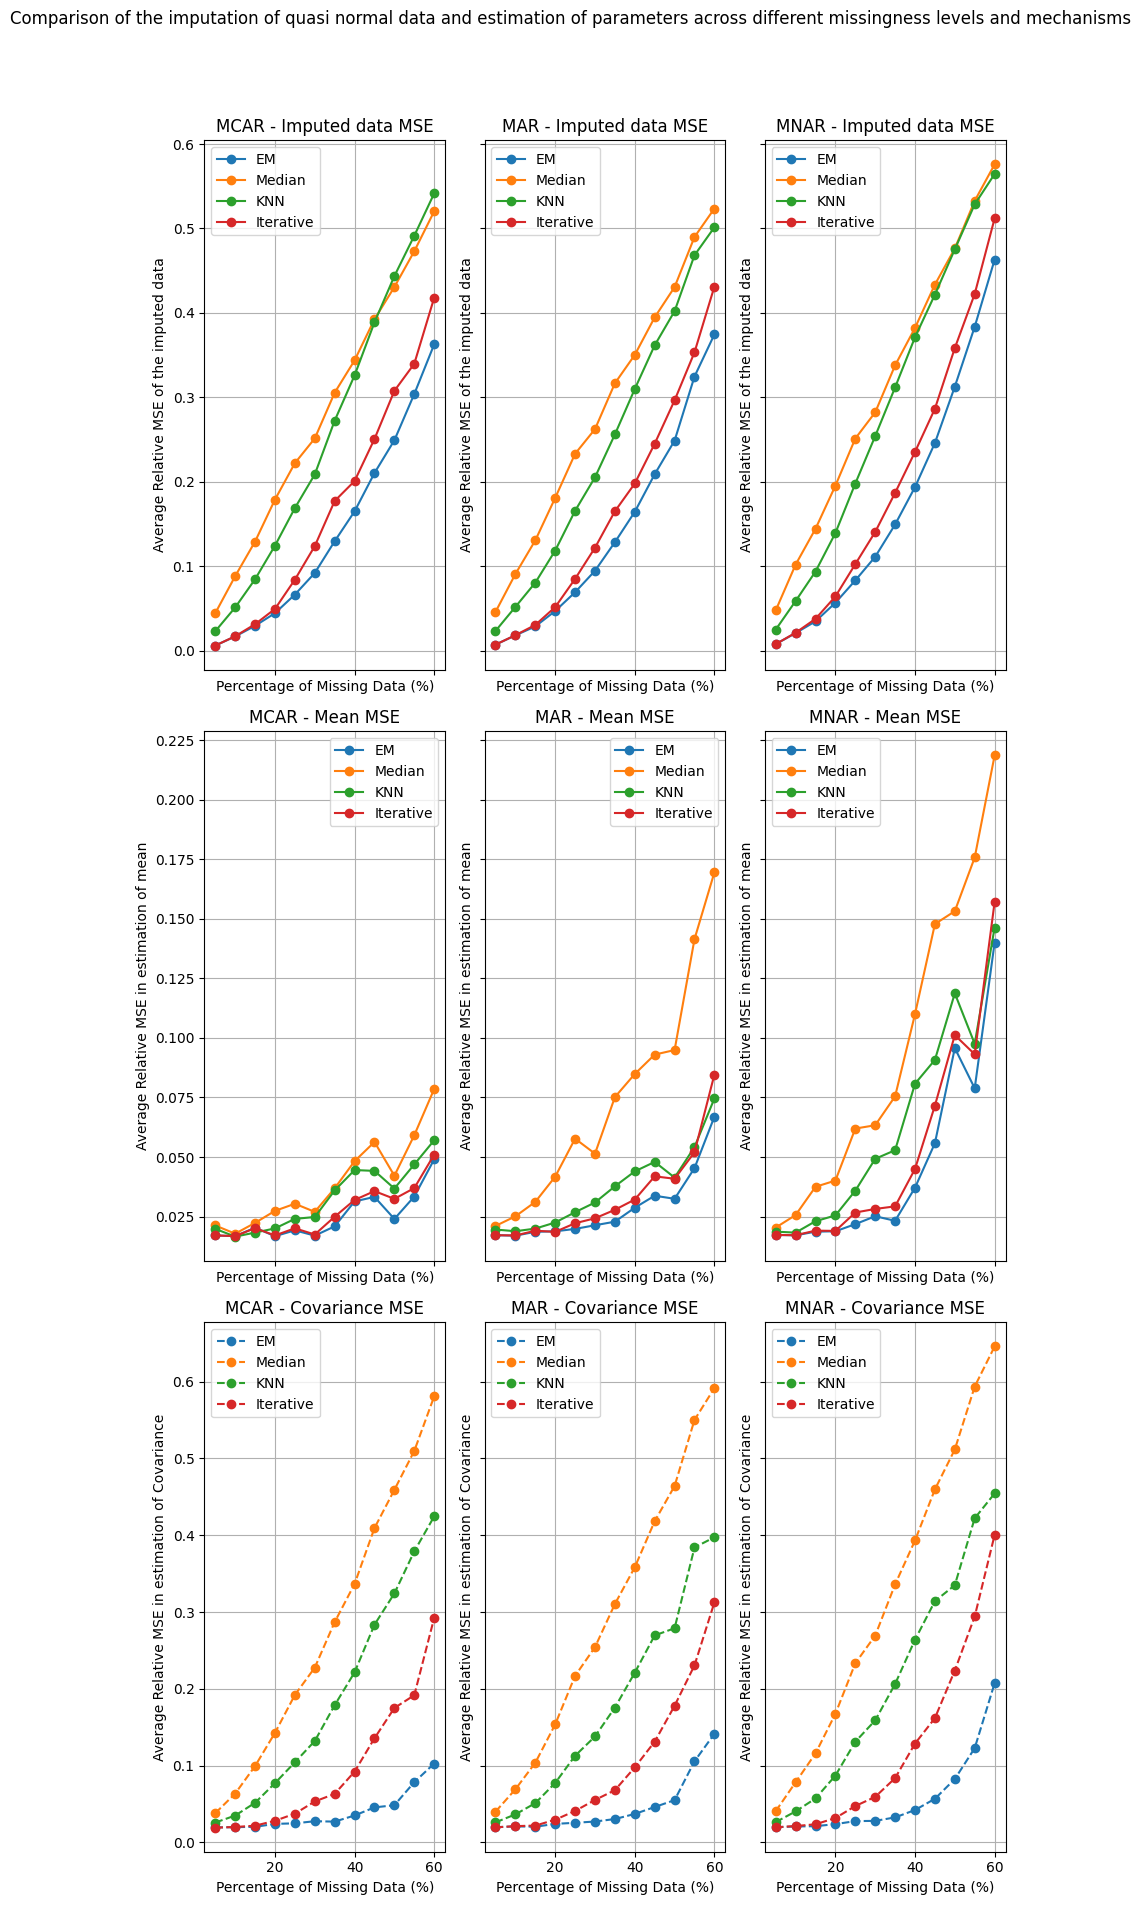

In [82]:
plot_all_differences_combined(X_quasi_normal, mean, real_cov_quasi_normal, plot_title = "Comparison of the imputation of nearly normal data and estimation of parameters across different missingness levels and mechanisms", verbose =True)

C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [Itera

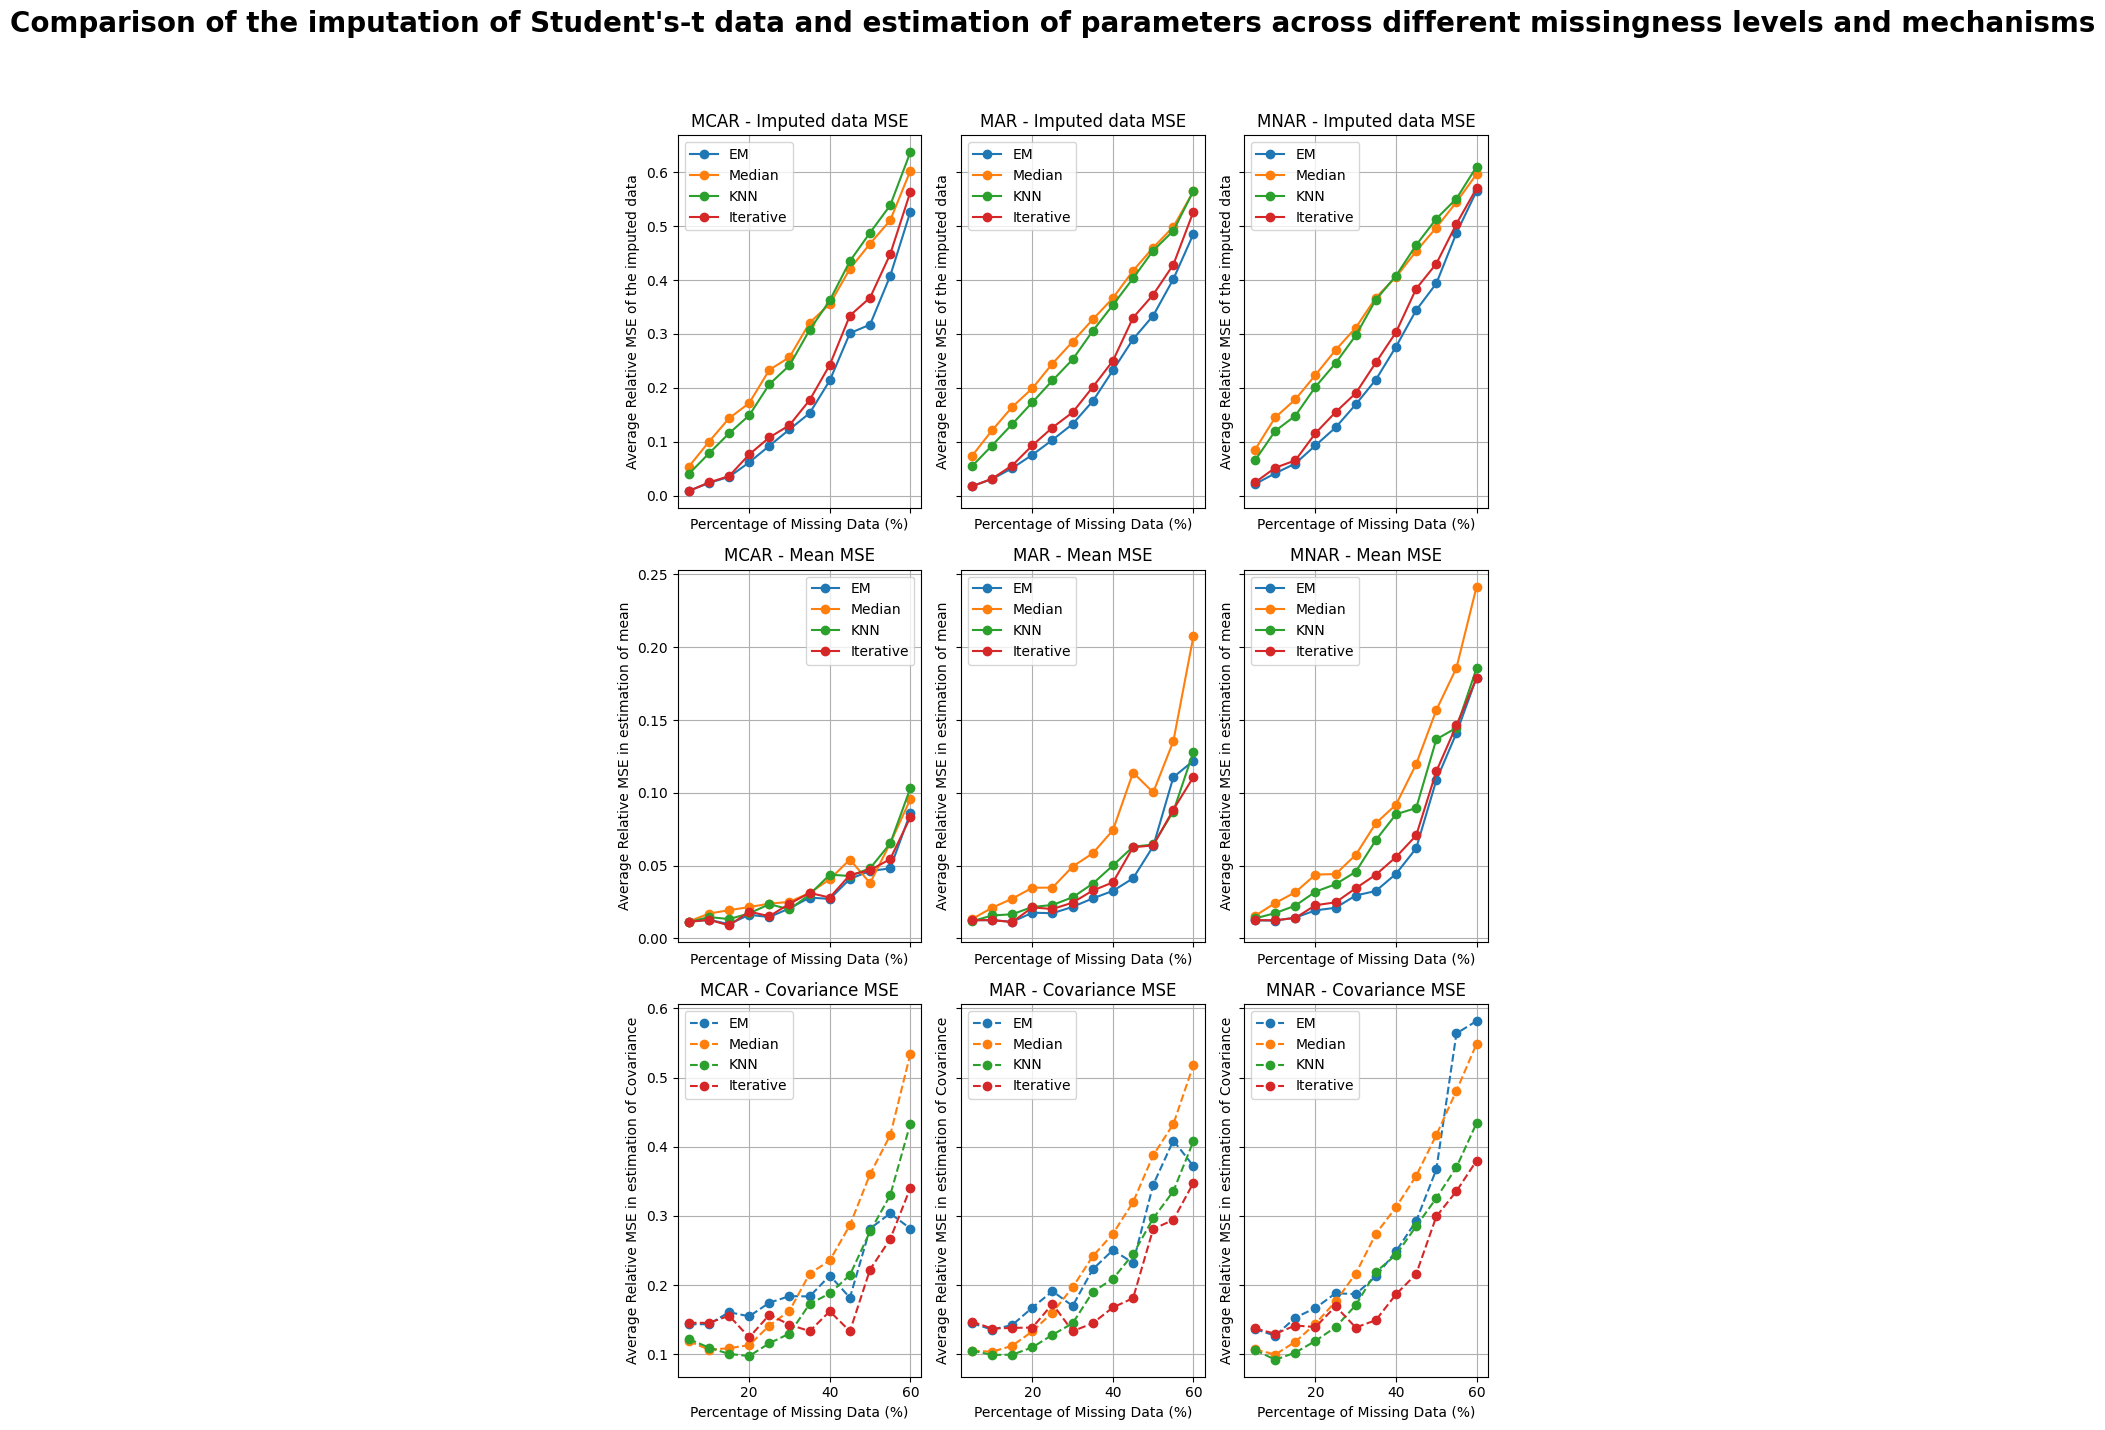

: 

In [90]:
# Generation of the multivariate t-distributed data
n = 200  # number of samples
d = 10  # number of features
df = 4  # degrees of freedom

mean = np.random.randn(d)  # mean vector
scale_matrix = 2*np.random.rand(d,d) - 2*np.random.rand(d,d) 
scale_matrix = scale_matrix.T.dot(scale_matrix) # make Scale matrix symmetric positive definite
real_cov
= scale_matrix * df / (df - 2)  # real covariance matrix
#print(np.linalg.eigvals(scale_matrix))  # check eigenvalues

X = generate_student_t(df, mean = mean, scale_matrix = scale_matrix, n_samples = n)
plot_all_differences_combined(X, real_mean = mean, real_cov = real_cov, plot_title = "Comparison of the imputation of Student's-t data and estimation of parameters across different missingness levels and mechanisms", verbose =False)